In [ ]:
import io
import pandas as pd
from google.colab import files

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")


import missingno as msno 
import matplotlib.pyplot as plt

import os
import re
import string
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [ ]:
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded.get('fake_job_postings.csv')))

Viewing and Exploration of the data

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
print(df)

       job_id                                              title  \
0           1                                   Marketing Intern   
1           2          Customer Service - Cloud Video Production   
2           3            Commissioning Machinery Assistant (CMA)   
3           4                  Account Executive - Washington DC   
4           5                                Bill Review Manager   
...       ...                                                ...   
17875   17876                   Account Director - Distribution    
17876   17877                                 Payroll Accountant   
17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17878   17879                                   Graphic Designer   
17879   17880                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing          NaN   
1            NZ, , Auckland      Success          NaN   
2           

In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

View jobs labeled as fraudulent 

In [ ]:
df.loc[df['fraudulent'] == 1]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",NaN,NaN,NaN,Student Positions Part-Time and Full-Time.You ...,NaN,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
17828,17829,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,NaN,NaN,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,NaN,NaN,NaN,NaN,NaN,1
17829,17830,Android Developer,"PL, MZ, Warsaw",NaN,NaN,NaN,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
17830,17831,Payroll Clerk,"US, NY, New York",NaN,NaN,NaN,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,NaN,NaN,Apparel & Fashion,Accounting/Auditing,1


Display null values

In [ ]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)

salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.324385
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.072707
location                1.935123
description             0.005593
job_id                  0.000000
telecommuting           0.000000
has_questions           0.000000
has_company_logo        0.000000
title                   0.000000
fraudulent              0.000000
dtype: float64

Checking for missing values

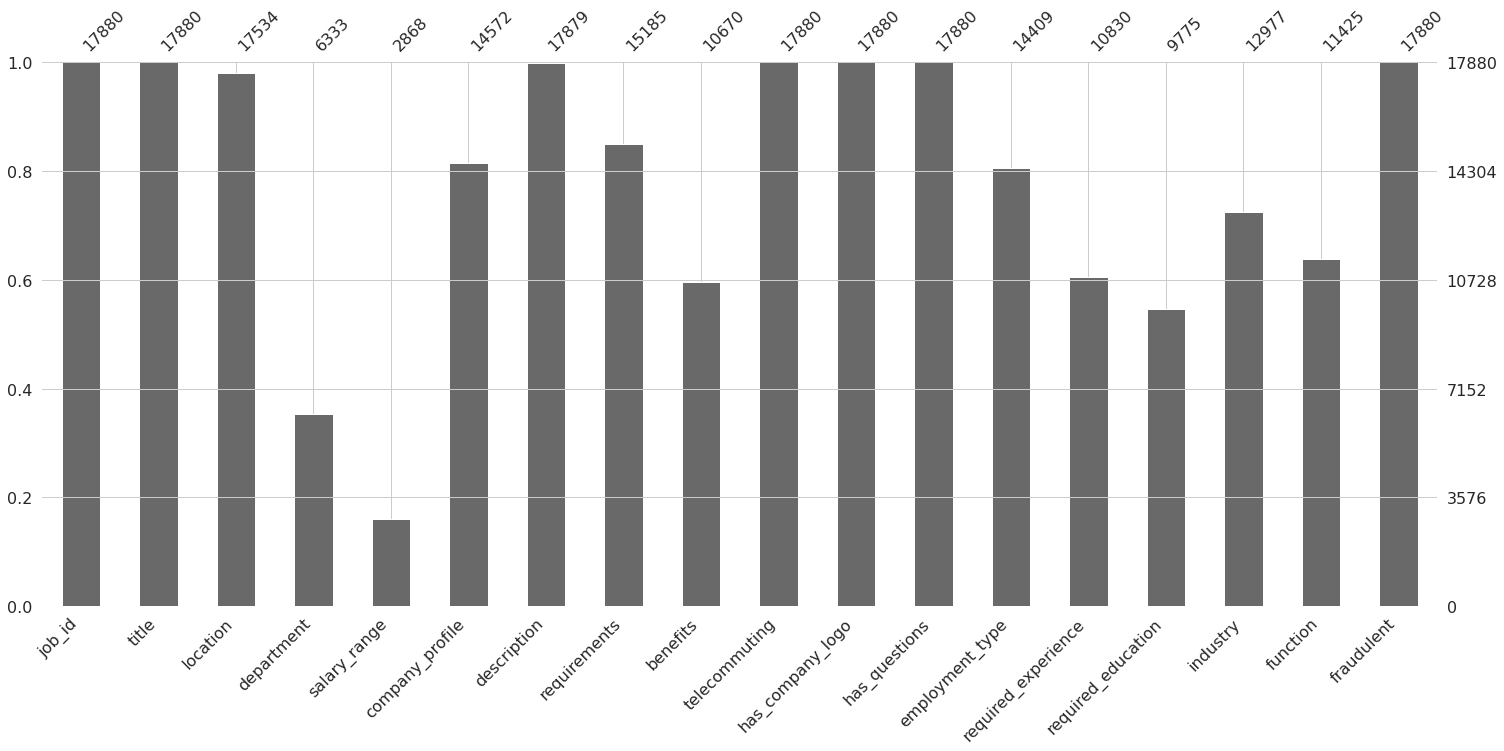

In [ ]:
msno.bar(df) 

Handling null values

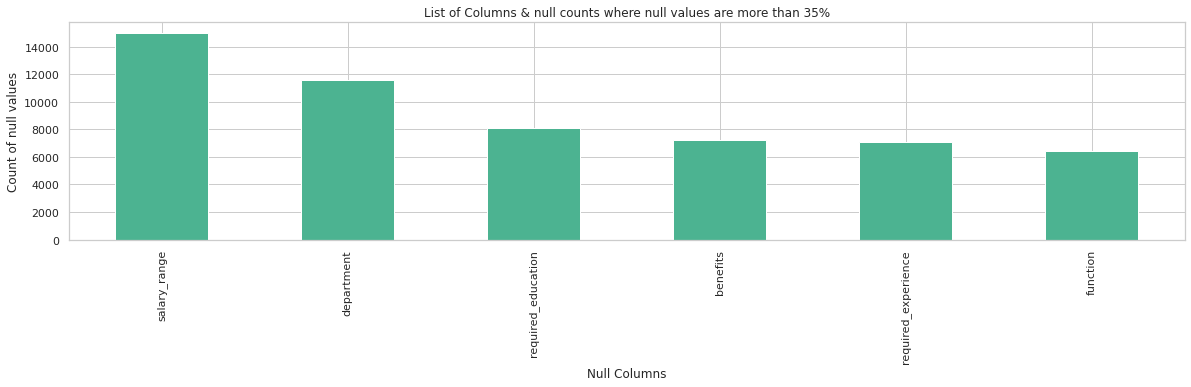

In [ ]:
null_col = df.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df))]


#Plotting Bar Graph for null values greater than 35%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('List of Columns & null counts where null values are more than 35%') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  
#Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

In [ ]:
len(null_col)

6

In [ ]:
#Making list of column names having null values greater than 35%
label = list(null_col.index.values) 
#Droping those columns
df.drop(labels = label,axis=1,inplace = True) 

In [ ]:
df.shape

(17880, 12)

In [ ]:
null = (df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)
null.head(30)

industry            27.421700
employment_type     19.412752
company_profile     18.501119
requirements        15.072707
location             1.935123
description          0.005593
job_id               0.000000
title                0.000000
telecommuting        0.000000
has_company_logo     0.000000
has_questions        0.000000
fraudulent           0.000000
dtype: float64

Imputing values

In [ ]:
df.value_counts().head()

job_id  title                                              location           company_profile                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
df.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
df.industry.value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

Finding out which industry has the highest number of fake job postings.

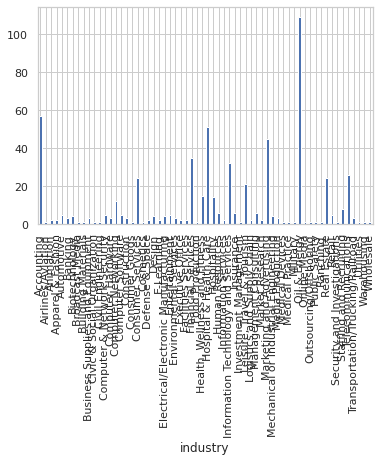

In [ ]:
df[df["fraudulent"]==1].groupby("industry")["job_id"].count().plot(kind="bar" )


In [ ]:
df = df.groupby(["industry", "fraudulent"], as_index=False)["job_id"].count().rename(columns={"job_id":"count"})
df

,industry,fraudulent,count
0,Accounting,0,102
1,Accounting,1,57
2,Airlines/Aviation,0,62
3,Airlines/Aviation,1,1
4,Alternative Dispute Resolution,0,1
...,...,...,...
187,Wholesale,0,10
188,Wholesale,1,1
189,Wine and Spirits,0,1
190,Wireless,0,4


Ratio for fradulence in industries

In [ ]:
pivot = df.pivot_table(index='industry',columns='fraudulent',aggfunc=sum)
pivot

count      
fraudulent                          0     1
industry                                   
Accounting                      102.0  57.0
Airlines/Aviation                62.0   1.0
Alternative Dispute Resolution    1.0   NaN
Animation                         3.0   2.0
Apparel & Fashion                95.0   2.0
...                               ...   ...
Warehousing                      50.0   1.0
Wholesale                        10.0   1.0
Wine and Spirits                  1.0   NaN
Wireless                          4.0   NaN
Writing and Editing              19.0   NaN

[131 rows x 2 columns]